In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()[0]

('2017-08-23')

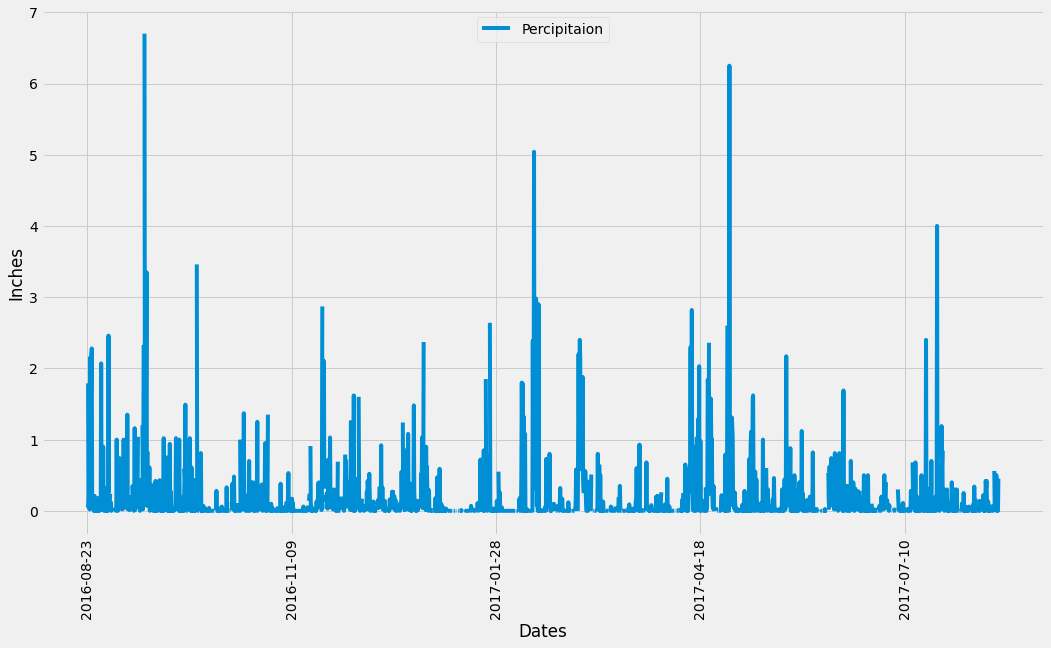

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=session.query(func.max(Measurement.date)).all()[0][0]
recent_date=datetime.strptime(recent_date,'%Y-%m-%d')

# Calculate the date one year from the last date in data set.
OneYearFromRecentDate=recent_date + relativedelta(months=-12)

# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date,Measurement.prcp).\
        filter(Measurement.date>=func.date(OneYearFromRecentDate))

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=['Date','Percipitaion'])
df.sort_values('Date',inplace=True)
#df.dropna(inplace=True) #Drop dates with no Percipitation

# Sort the dataframe by date
df.sort_values('Date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date',y='Percipitaion',figsize=(16,9),rot=90,xlabel='Dates',ylabel='Inches')
plt.legend(loc='upper center')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['Percipitaion'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Percipitaion, dtype: float64

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Station.station,func.count(Measurement.station)).\
filter(Station.station==Measurement.station).\
group_by(Station.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').\
group_by(Measurement.station).all()

[(54.0, 85.0, 71.66378066378067)]

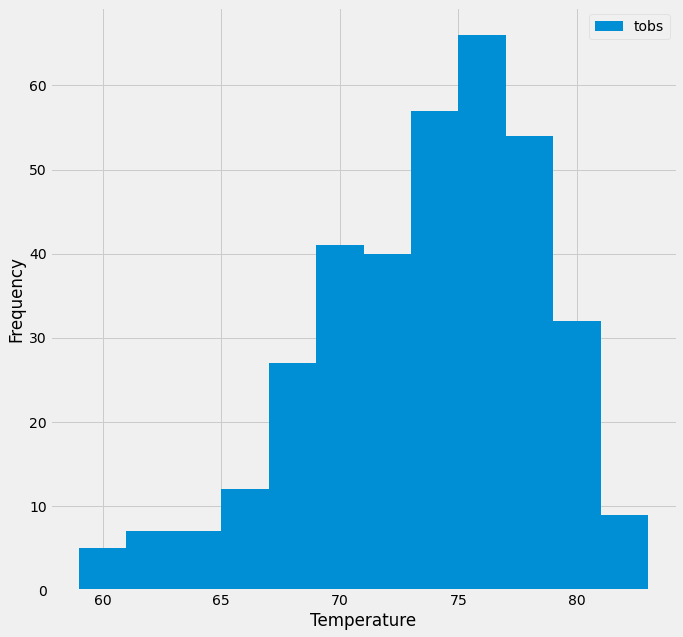

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

max_date=session.query(func.max(Measurement.date)).filter(Measurement.station=='USC00519281').all()[0][0]
max_date=datetime.strptime(max_date,'%Y-%m-%d')
OneYearFromMaxDt=max_date + relativedelta(months=-12)
results=session.query(Measurement.tobs).\
        filter(Measurement.station=='USC00519281',Measurement.date>=func.date(OneYearFromMaxDt)).all()
pd.DataFrame(results,columns=['tobs']).hist(column='tobs',bins=12,legend=True,figsize=(10,10))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(None)
plt.show()

# Close Session

In [36]:
session.close()